# Bike Sharing Prediction

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [84]:
bikes = pd.read_csv('day (1).csv', header=0)
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [85]:
bikes.shape

(730, 16)

In [86]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [87]:
bikes.dteday = pd.to_datetime(bikes.dteday, errors='coerce')

In [88]:
bikes['dteday'].dtype

dtype('<M8[ns]')

In [89]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
bikes_0 = bikes[bikes['yr']==0]
bikes_1 = bikes[bikes['yr']==1]

In [90]:
bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [91]:
index_col = []
cont_col = []
cat_col = []
for i in bikes.columns:
    if bikes[i].nunique()<=12:
        cat_col.append(i)
    else:
        cont_col.append(i)

In [92]:
index_col.append(cont_col.pop(0))
index_col.append(cont_col.pop(0))

In [93]:
print(index_col)
print(cont_col)
print(cat_col)

['instant', 'dteday']
['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


temp vs. atemp


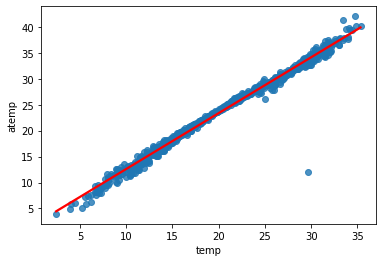


temp vs. windspeed


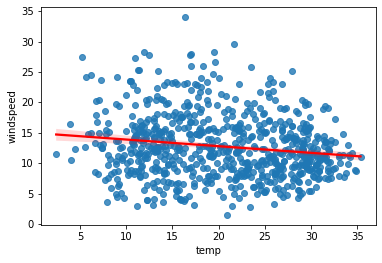


temp vs. registered


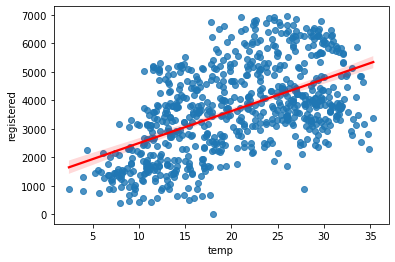


atemp vs. windspeed


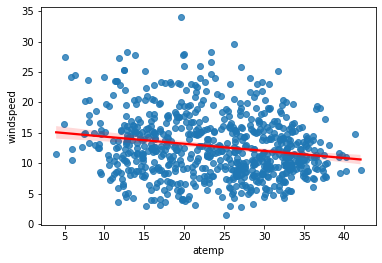


atemp vs. registered


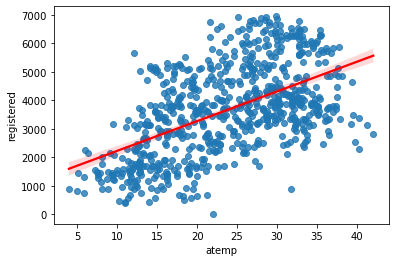


hum vs. registered


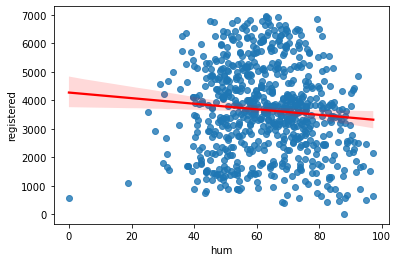


windspeed vs. cnt


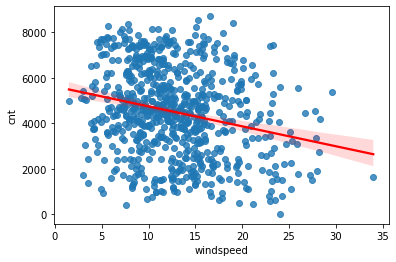

In [100]:
j_col = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for i in cont_col:
    for j in j_col:
        if i!=j:
            print(i,'vs.',j)
            sns.regplot(x=i,y=j, data=bikes,line_kws={'color':'red'})
            plt.show()
            print()
            j_col.pop(0)

temp vs. atemp


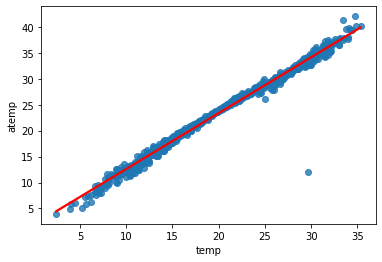


temp vs. hum


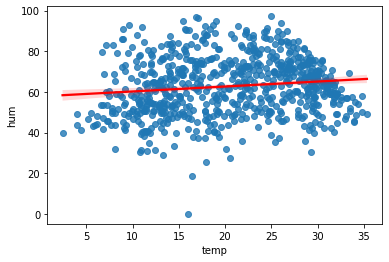


temp vs. windspeed


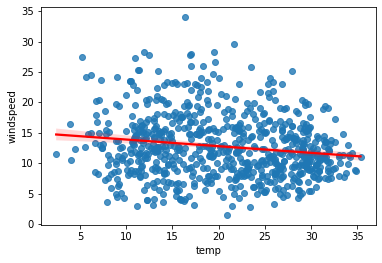


temp vs. casual


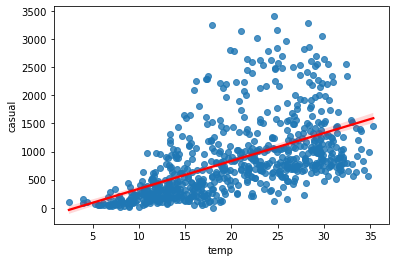


temp vs. registered


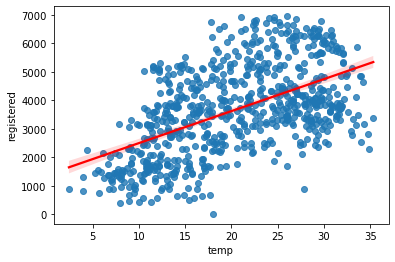


temp vs. cnt


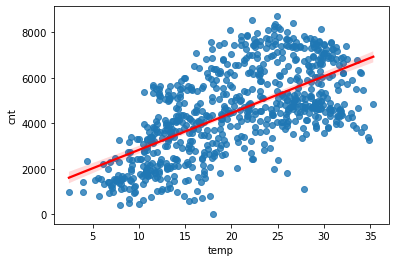


atemp vs. temp


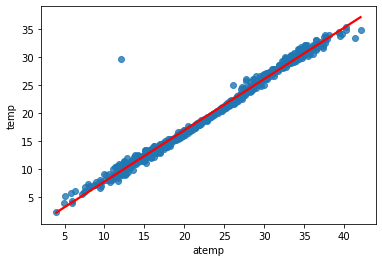


atemp vs. hum


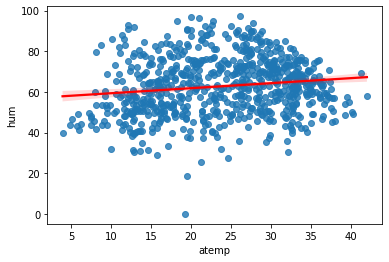


atemp vs. windspeed


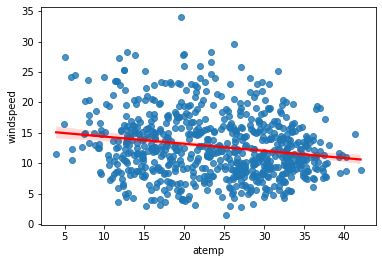


atemp vs. casual


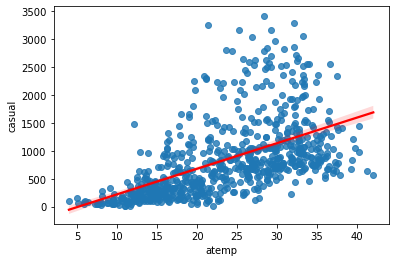


atemp vs. registered


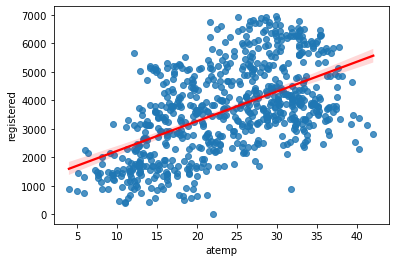


atemp vs. cnt


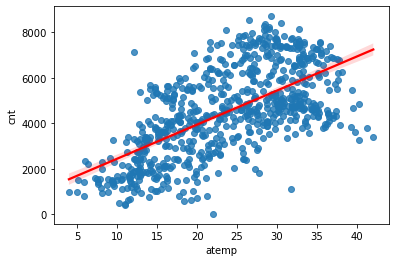


hum vs. temp


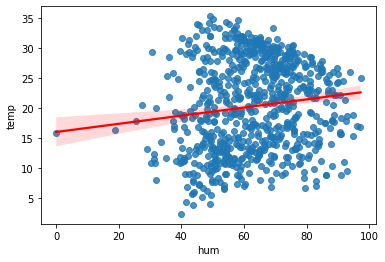


hum vs. atemp


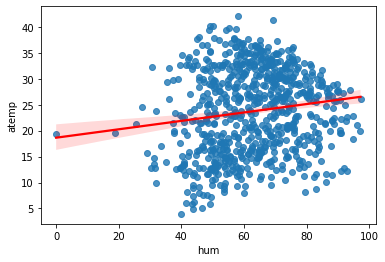


hum vs. windspeed


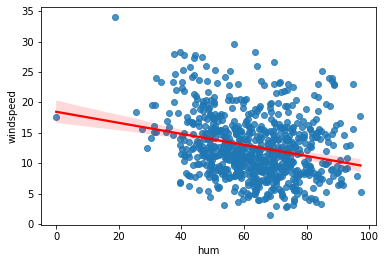


hum vs. casual


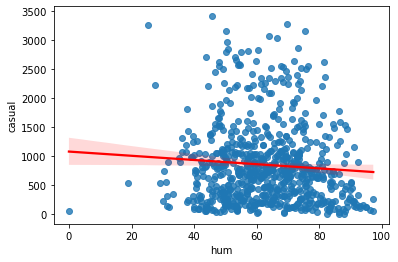


hum vs. registered


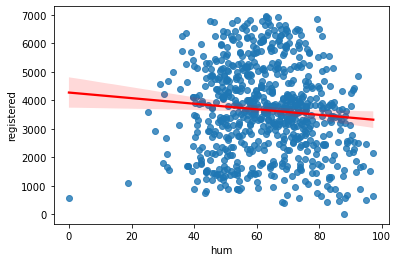


hum vs. cnt


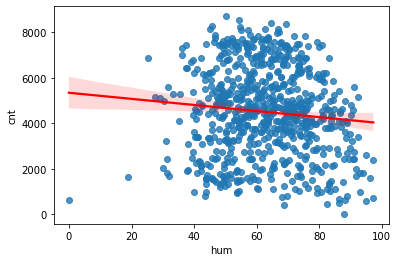


windspeed vs. temp


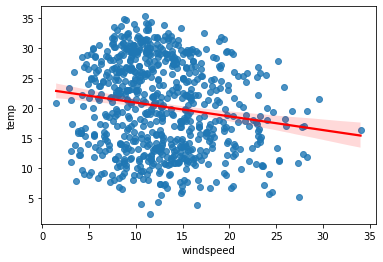


windspeed vs. atemp


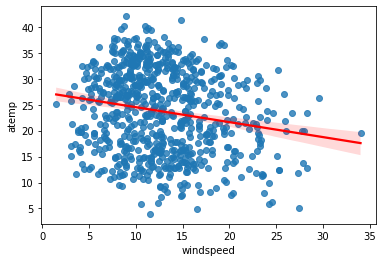


windspeed vs. hum


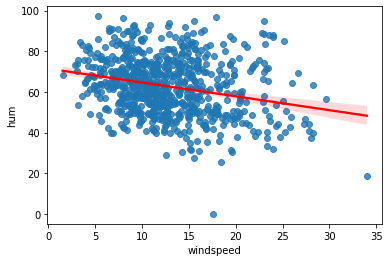


windspeed vs. casual


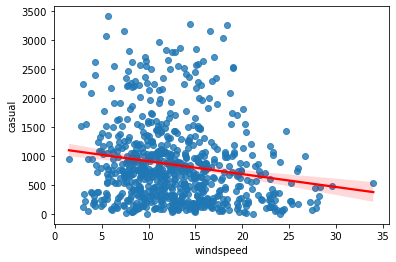


windspeed vs. registered


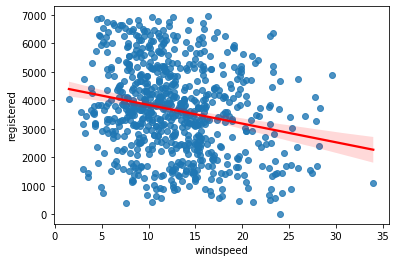


windspeed vs. cnt


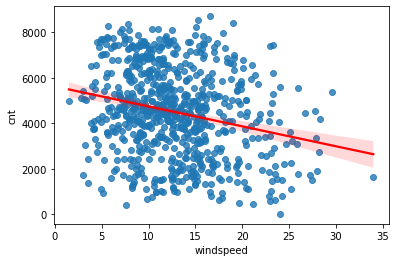


casual vs. temp


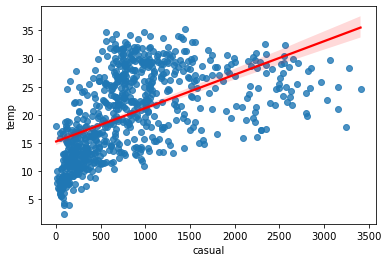


casual vs. atemp


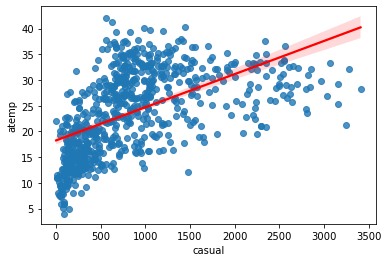


casual vs. hum


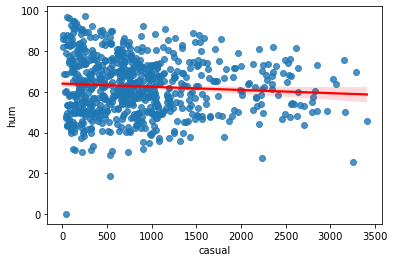


casual vs. windspeed


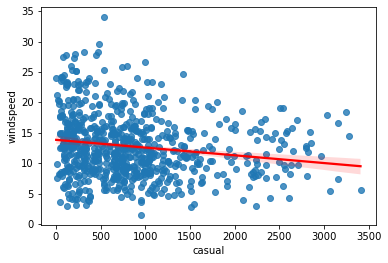


casual vs. registered


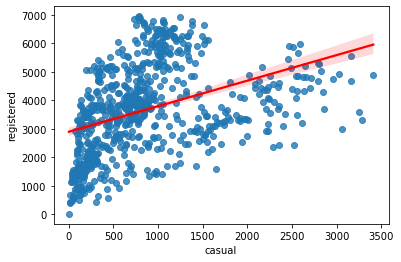


casual vs. cnt


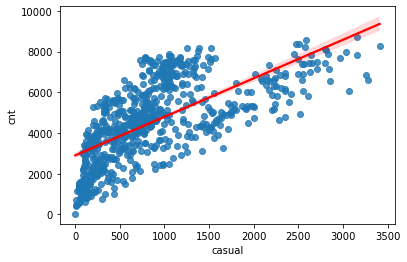


registered vs. temp


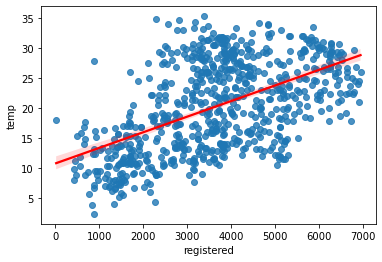


registered vs. atemp


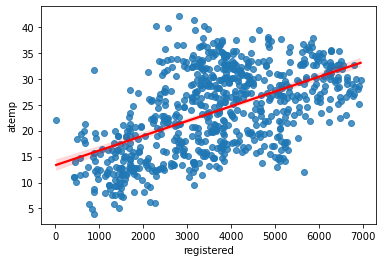


registered vs. hum


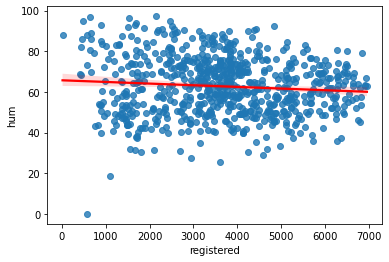


registered vs. windspeed


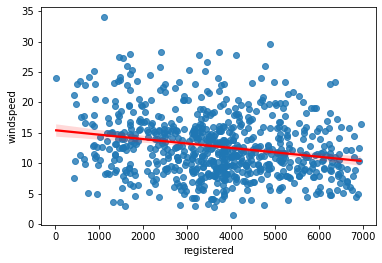


registered vs. casual


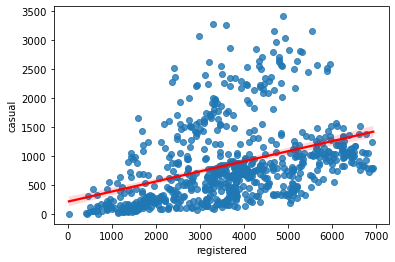


registered vs. cnt


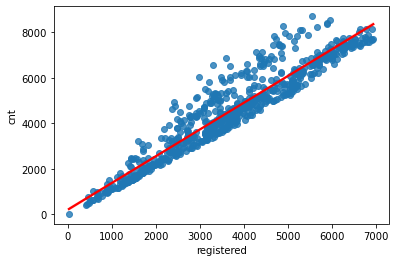


cnt vs. temp


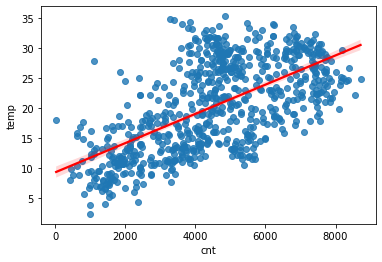


cnt vs. atemp


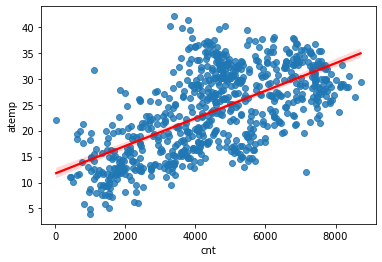


cnt vs. hum


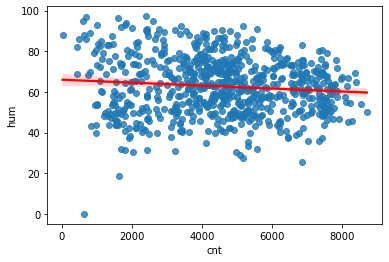


cnt vs. windspeed


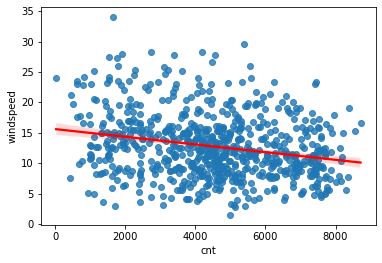


cnt vs. casual


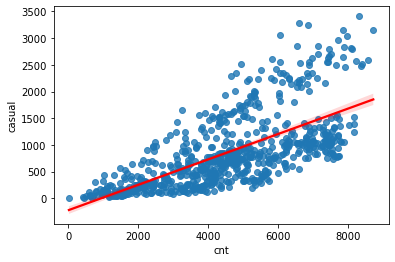


cnt vs. registered


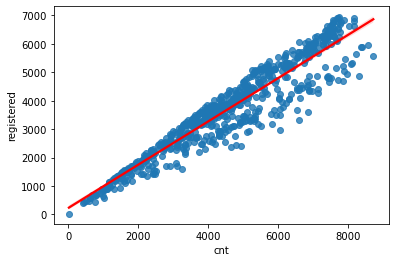

In [102]:
for i in cont_col:
    for j in cont_col:
        if i!=j:
            print(i,'vs.',j)
            sns.regplot(x=i,y=j, data=bikes,line_kws={'color':'red'})
            plt.show()
            print()

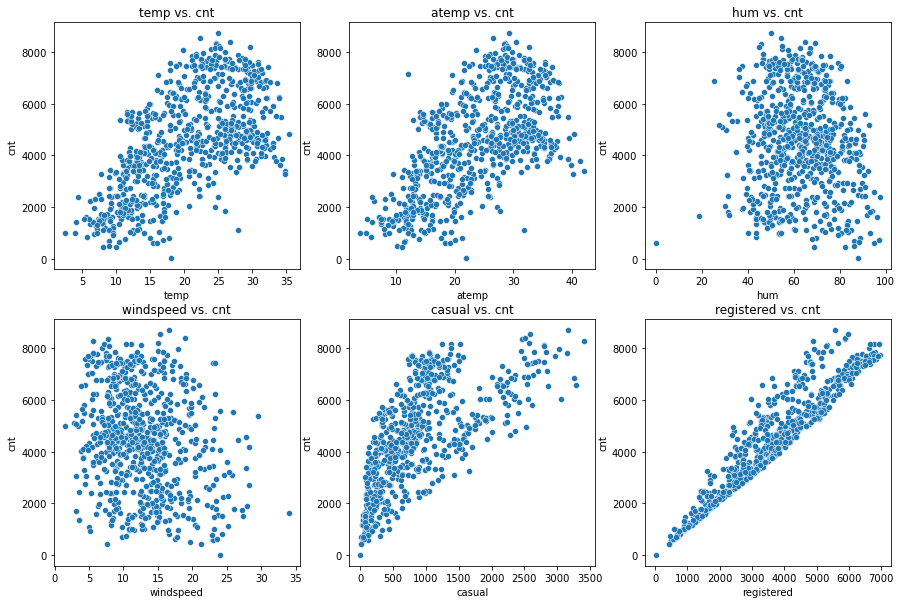

In [96]:
plt.figure(figsize=[15,10])
for n,i in enumerate(cont_col):
    j='cnt'
    if i!=j:
        plt.subplot(2,3,n+1)
        sns.scatterplot(x=i,y=j, data=bikes)
        plt.title(i+' vs. '+j)
plt.show()


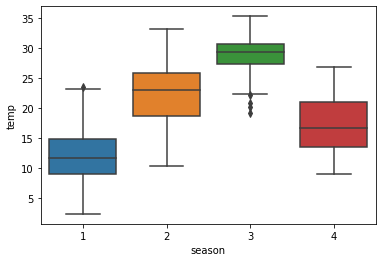

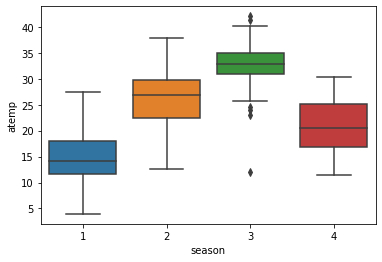

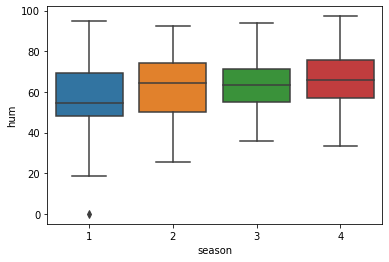

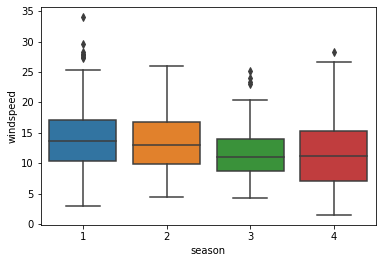

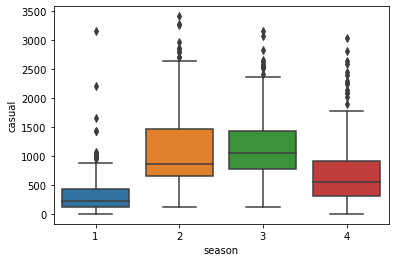

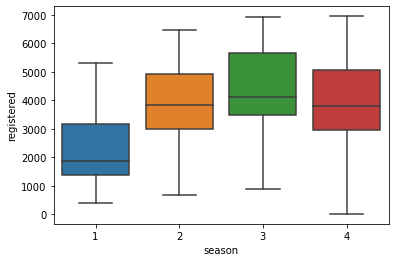

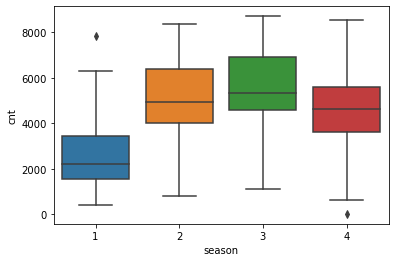

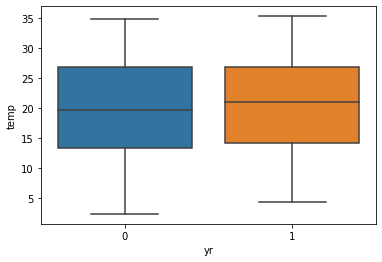

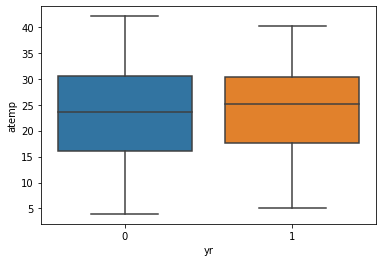

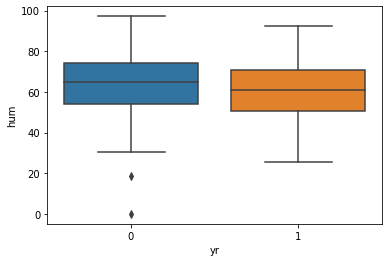

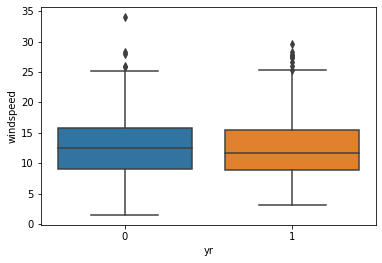

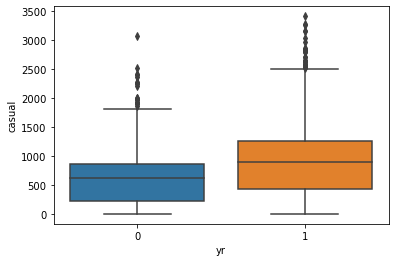

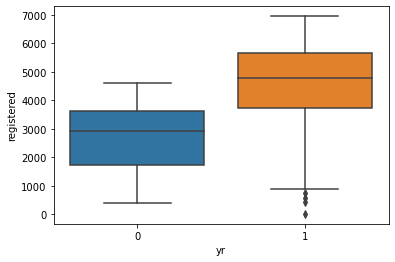

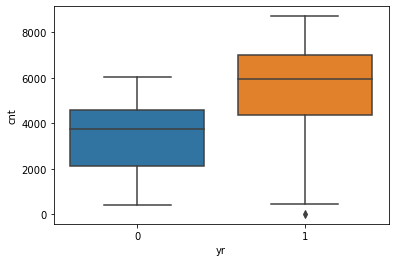

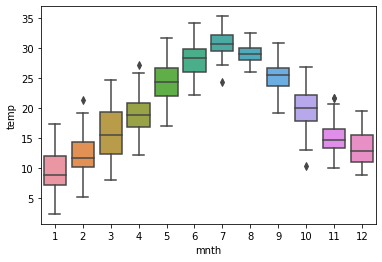

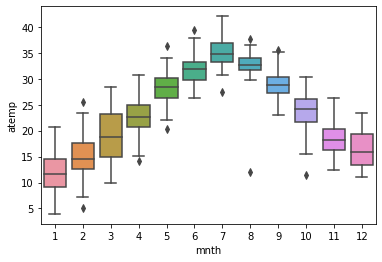

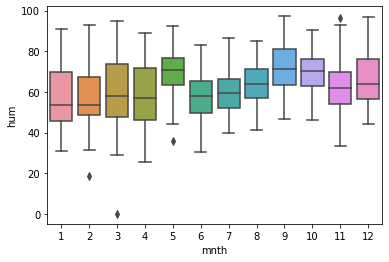

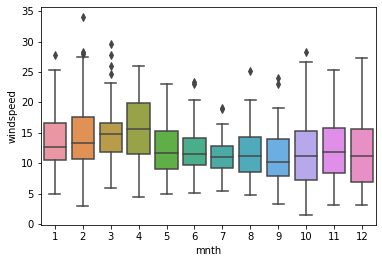

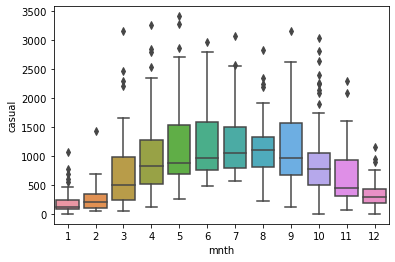

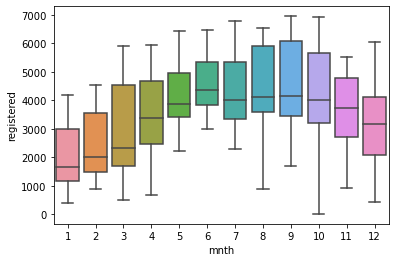

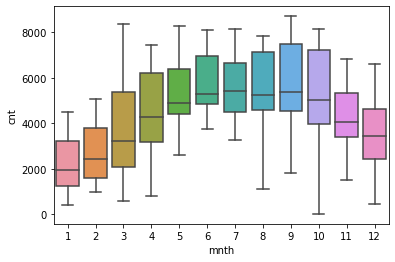

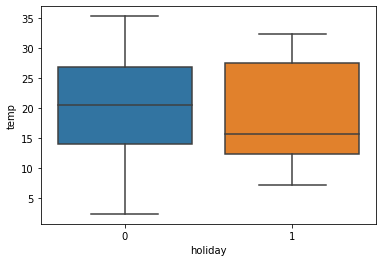

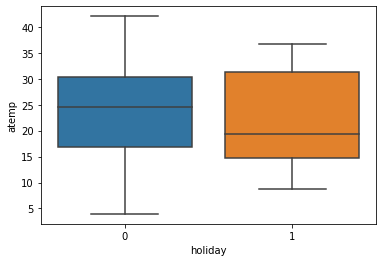

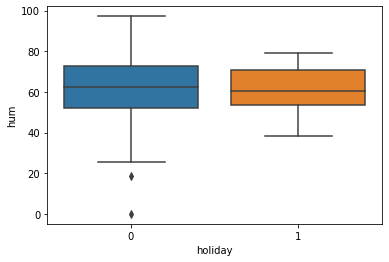

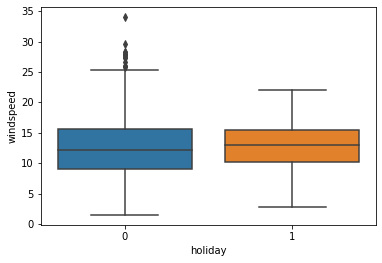

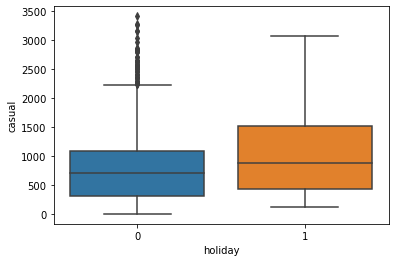

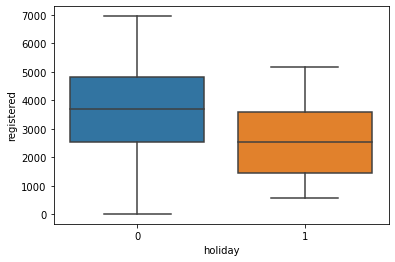

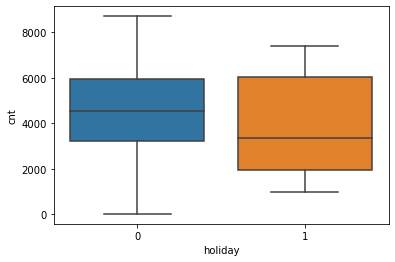

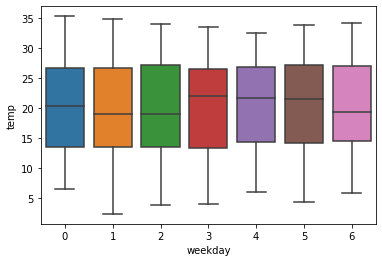

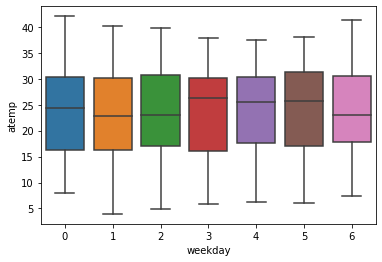

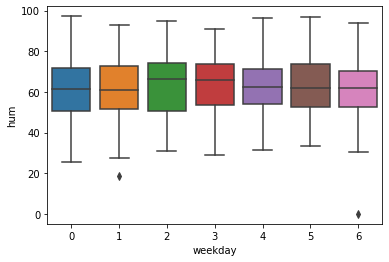

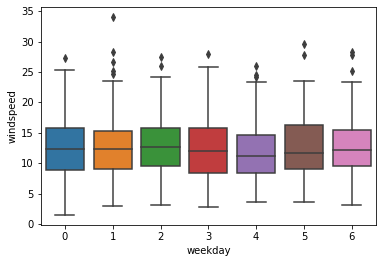

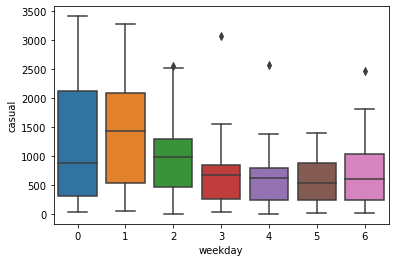

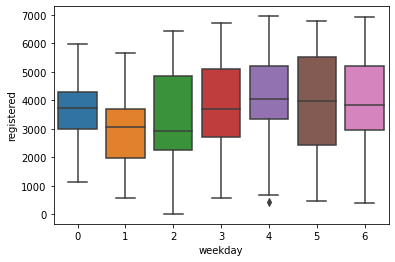

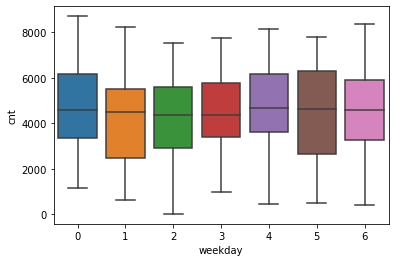

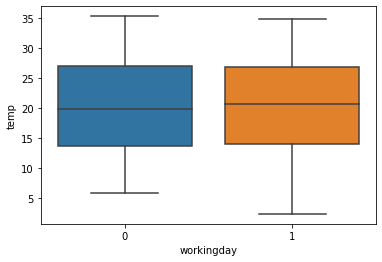

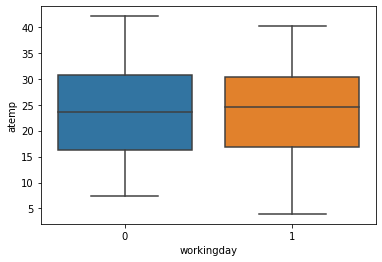

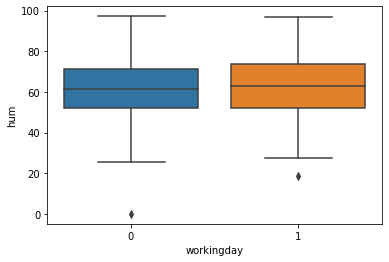

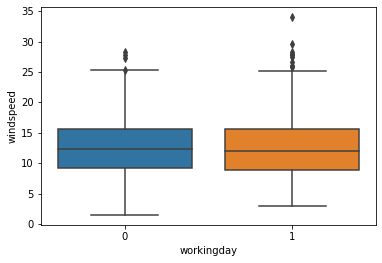

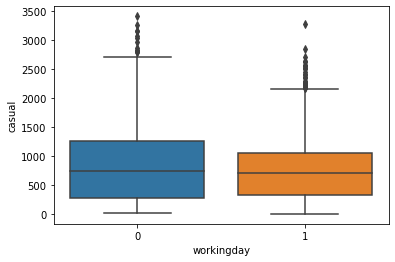

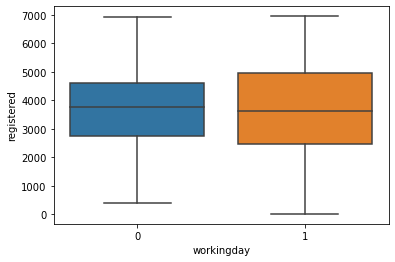

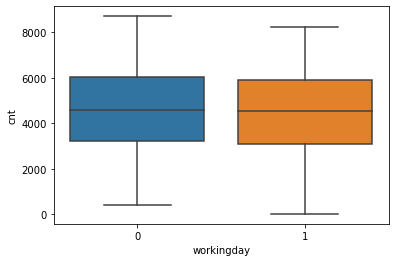

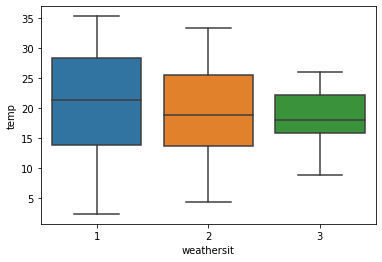

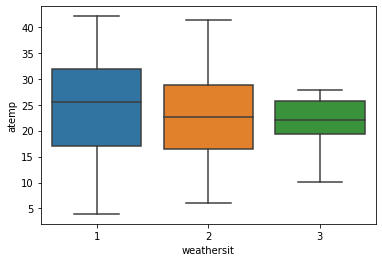

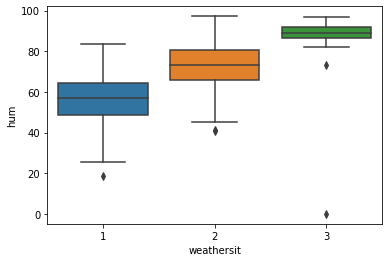

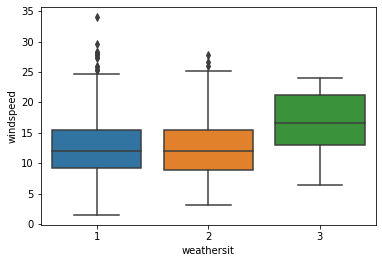

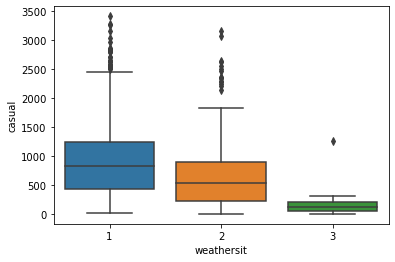

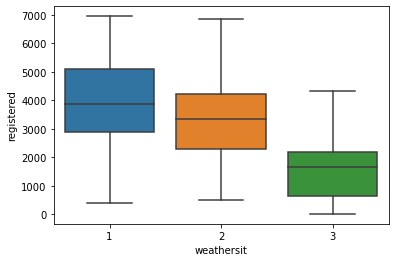

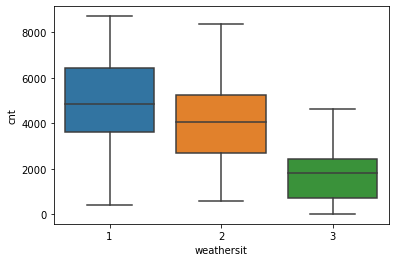

In [103]:
  for i in cat_col:
        for j in cont_col:
            sns.boxplot(x=i, y=j, data=bikes)
            plt.show()

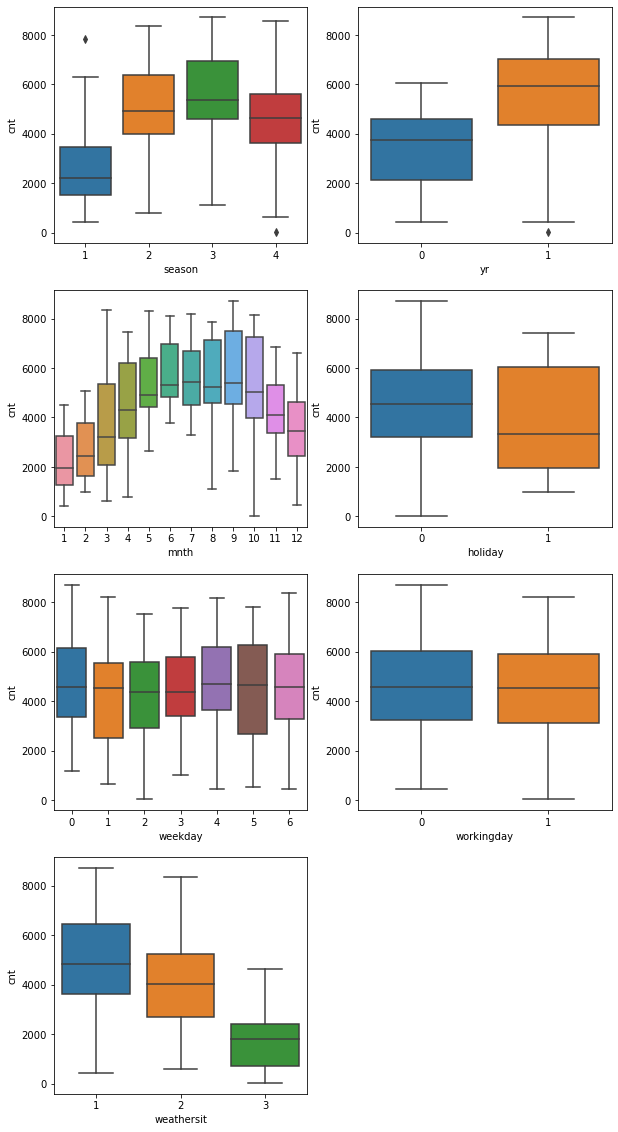

In [110]:
plt.figure(figsize=[10,20])
for n,i in enumerate(cat_col):
    plt.subplot(4,2,n+1)
    sns.boxplot(x=i, y='cnt', data=bikes)
plt.show()

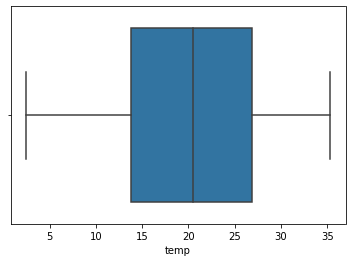

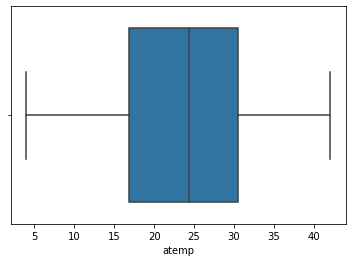

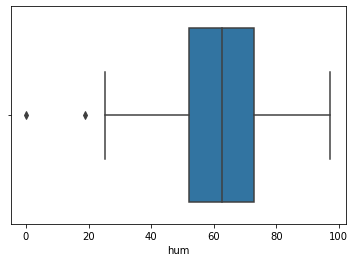

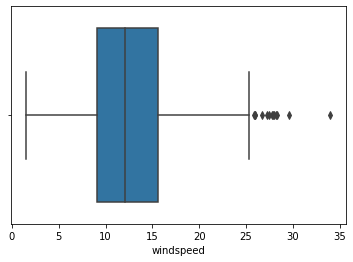

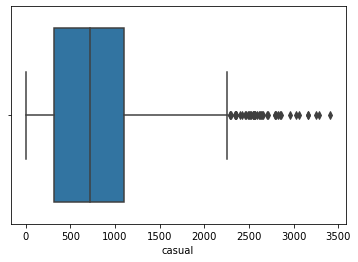

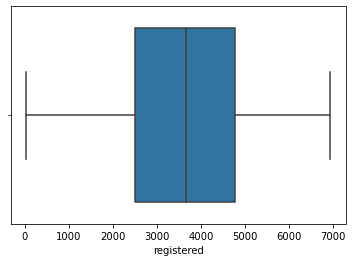

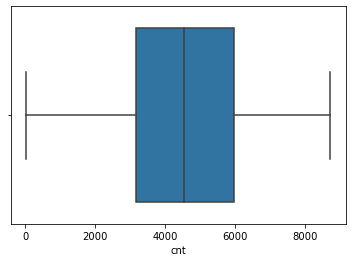

In [117]:
for i in cont_col:
    sns.boxplot(bikes[i])
    plt.show()
    print()

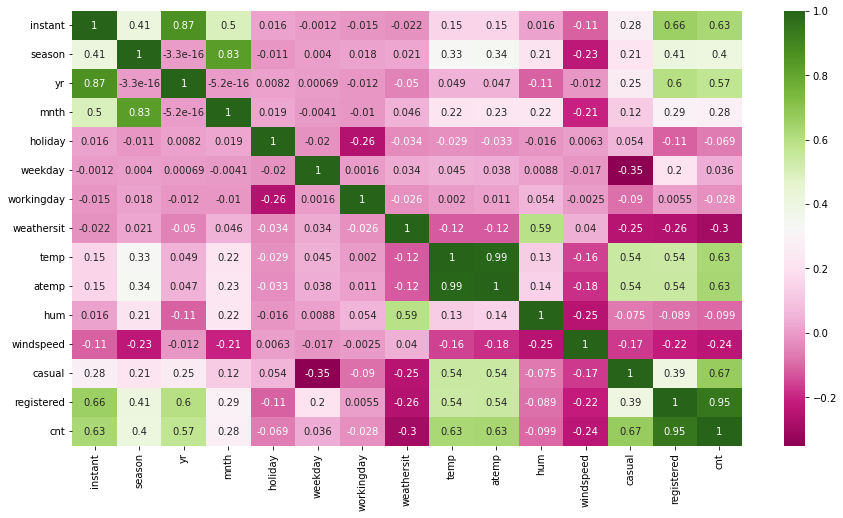

In [114]:
plt.figure(figsize=[15,8])
sns.heatmap(bikes.corr(),cmap='PiYG', annot=True)
plt.show()